In [1]:
#Importazione delle librerie necessarie
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#Carichiamo sul notebook del csv e lo trasformiamo in dataset
csv = pd.read_csv("googleplaystore.csv")
data_app = pd.DataFrame(csv)

#Stampiamo il dataset
data_app







,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [2]:
print(""""\033[1mPossiamo notare da questa tabella quali sono le app più installate e quelle meno installate IN BASE alla categoria 'COMMUNICATION'(che compare ben 17 volte e si propone come prima delle varia categorie come abbiamo visto prima)
Possiamo estrare da qui sotto le varie informazioni e constatare come l'app Messenger – Text and Video Chat for Free sia la più installata\033[0m""")
print('\n')

#Questa funzione converte tutte le stringhe in numeri interi e nel caso un valore sia "Free" ci restituisce il numero 0
def converti_a_intero(s):
    if s == 'Free':
        s = '0'
    s = s.replace('+', '')
    s = s.replace(',', '')
    return int(s)

#Qui creiamo le due serie, strutturate come nel codice successivo a questo commento
x = data_app[data_app['Category'] == 'COMMUNICATION']['App']
y_tmp= data_app[data_app['Category'] == 'COMMUNICATION']['Installs'].apply(converti_a_intero)
y = y_tmp.sort_values()

""""qui uniamo le due serie convertendo i nomi delle app e i numeri della serie installs (le quali sono tutte di tipo object) 
della serie in stringhe e ordinando per valore la colonna 'Installs'"""

#Creare un DataFrame temporaneo con le colonne 'App' e 'Installs'
temp_df = pd.DataFrame({
    'App': x,
    'Installs': y
})

#Ordinare il DataFrame in base alle installazioni dal valore di installazioni più alto al più piccolo
temp_df = temp_df.sort_values(by='Installs', ascending = False)

#Creare una nuova Serie combinata
combined_series = temp_df['App'].reset_index(drop=True) + ' -- ' + temp_df['Installs'].astype(str).reset_index(drop=True)

#Stampiamo le serie combinate
print(combined_series.head(20).unique())



"Possiamo notare da questa tabella quali sono le app più installate e quelle meno installate IN BASE alla categoria 'COMMUNICATION'(che compare ben 17 volte e si propone come prima delle varia categorie come abbiamo visto prima)
Possiamo estrare da qui sotto le varie informazioni e constatare come l'app Messenger – Text and Video Chat for Free sia la più installata


['Messenger – Text and Video Chat for Free -- 1000000000'
 'Skype - free IM & video calls -- 1000000000'
 'Google Chrome: Fast & Secure -- 1000000000' 'Hangouts -- 1000000000'
 'WhatsApp Messenger -- 1000000000' 'Gmail -- 1000000000'
 'imo free video calls and chat -- 500000000']


Un altro modo per trovare quelle che sono le app più installate, ma questa volta osservando quelle che sono le categorie più in voga di installazione


APP PIU' INSTALLATE


['UC Browser - Fast Download Private & Secure', '-------', 'LINE: Free Calls & Messages', '-------', 'Flipboard: News For Our Time', '-------', 'Cloud Print', '-------', 'Gboard - the Google Keyboard', '-------', 'Viber Messenger', '-------', 'imo free video calls and chat', '-------', 'Google Translate', '-------', 'Candy Crush Saga', '-------', 'Clean Master- Space Cleaner & Antivirus', '-------', 'Flipboard: News For Our Time', '-------', 'Google Calendar', '-------', 'Google Translate', '-------', 'Facebook Lite', '-------', 'Candy Crush Saga', '-------', 'Temple Run 2', '-------', 'Flipboard: News For Our Time', '-------', 'LINE: Free Calls & Messages', '-------', 'MX Player', '-------', 'Gboard - the Google Keyboard', '-------', 'Candy Crush Saga', '-------', 'Snapchat', '-------', 'Samsung Health', '-------'

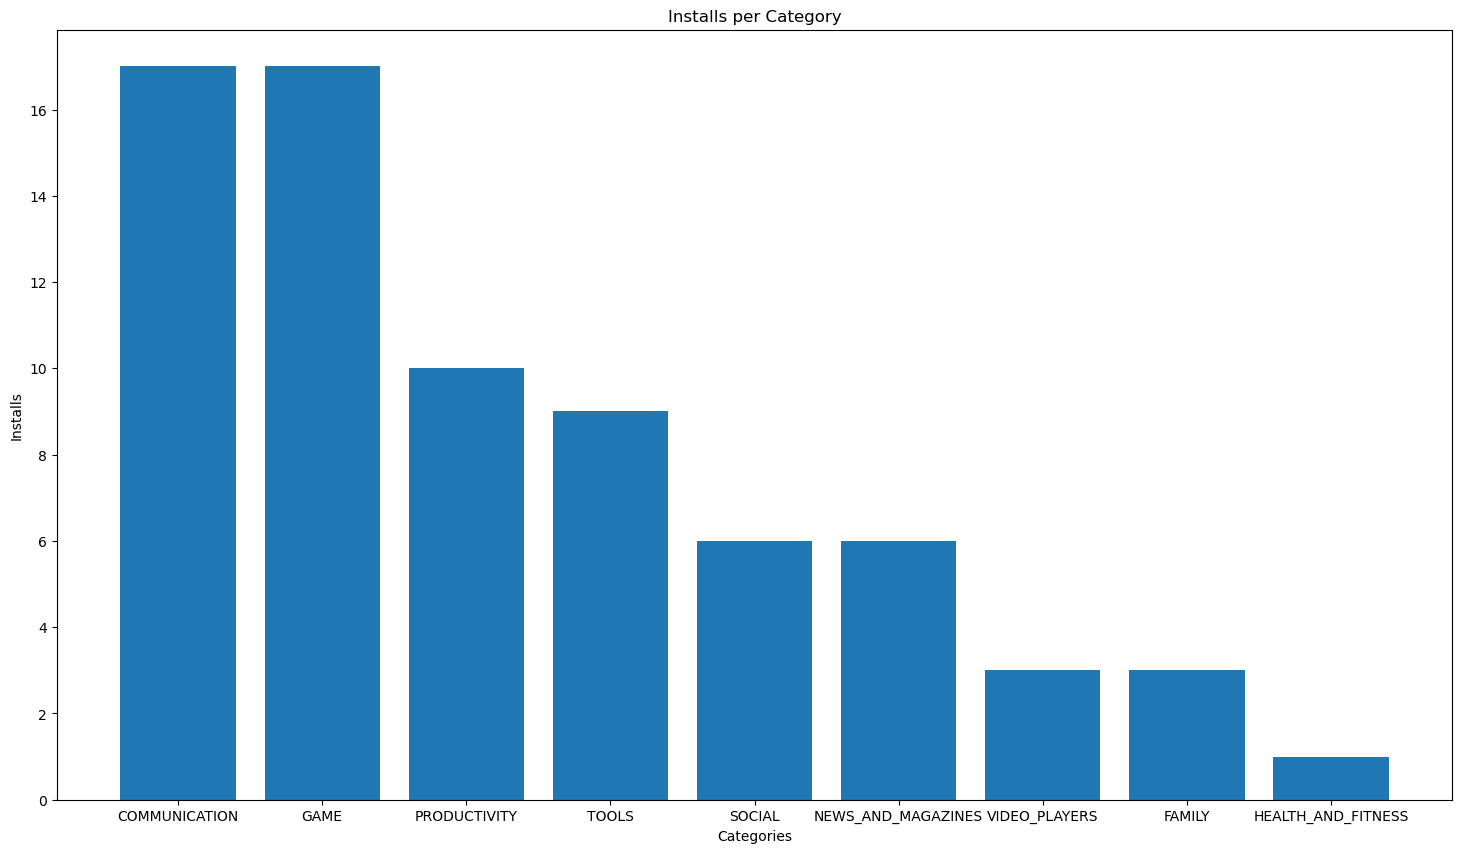





Abbiamo capito quindi e anche visualizzato che le top due categorie sono Communication e Game
Quindi per avere assai popolarità nel creare una nuova app nostra e pubblica dobbiamo cercare di centrare queste due categorie


In [3]:
print("\033[1mUn altro modo per trovare quelle che sono le app più installate, ma questa volta osservando quelle che sono le categorie più in voga di installazione\033[0m")

#Qui abbiamo selezionato le due colonne app e installs, ordinando per i valori Installs in descrescenza
data_installed = data_app [['App', 'Installs']]
data_installed = data_installed.sort_values(by = 'Installs', ascending = False)
data_installed = data_installed.reset_index(drop=True)
data_installed.head(10)

#Creiamo ora una lista nella quale inseriamo le app più installate
list = []
for el, el2 in zip (data_installed.Installs, data_installed.App):
    if el == '500,000,000+':
        list.append(el2)
        list.append('-------')
print ('\n')
print('APP PIU\' INSTALLATE')
print('\n')
print(list)


#Qui prendiamo le categorie più installate
list_category = []
for el, el2 in zip (data_app.Category, data_app.App):
    if el2 in list:
        list_category.append(el)
print('\n')
print('\n')
print('CATEGORIE PIU\' INSTALLATE')
print('\n')
print(list_category)


data = {
    'Categoria': [],
    'Installazioni': []
}

data_grafico = pd.DataFrame(data)

rows = []


#Stampare il conteggio per ciascuna occorrenza di categoria in ordine descrescente
conteggio = Counter(list_category)
for elemento, occorrenze in conteggio.most_common():
    print('\n')
    print(f"'{elemento}' appare {occorrenze} volte.")
    
#Popola la lista con un ciclo for
for elemento, occorrenze in conteggio.most_common():
    row = {
        'Categorie': elemento,
        'Installazioni': occorrenze
    }
    rows.append(row)

data_grafico = pd.DataFrame(rows)



x = data_grafico['Categorie']
y = data_grafico['Installazioni']

print('\n')
print('\n')
print('\033[1m Di seguito viene riportato il grafico collegato \033[0m')

#Imposta le dimensioni del grafico
plt.figure(figsize=(18, 10))

#Traccia il grafico
plt.bar(x, y)

#Aggiungi etichette agli assi
plt.xlabel('Categories')
plt.ylabel('Installs')

#Titolo del grafico
plt.title('Installs per Category')

#Mostra il grafico
plt.show()

print('\n')
print('\n')
print('\033[1mAbbiamo capito quindi e anche visualizzato che le top due categorie sono Communication e Game\033[0m')
print('\033[1mQuindi per avere assai popolarità nel creare una nuova app nostra e pubblica dobbiamo cercare di centrare queste due categorie\033[0m')



In [4]:
print(""""\033[1mPossiamo notare da questa tabella quali sono le app più installate e quelle meno installate IN BASE alla categoria 'GAME'(che compare ben 17 volte e si propone come prima delle varia categorie come abbiamo visto prima)
Possiamo estrarre da qui sotto le varie informazioni e constatare come l'app Subway Surfers sia la più installata\033[0m""")
print('\n')

#Questa funzione converte tutte le stringhe in numeri interi e nel caso un valore sia "Free" ci restituisce il numero 0
def converti_a_intero(s):
    if s == 'Free':
        s = '0'
    s = s.replace('+', '')
    s = s.replace(',', '')
    return int(s)

#Qui creiamo le due serie, strutturate come nel codice successivo a questo commento
x = data_app[data_app['Category'] == 'GAME']['App']
y_tmp= data_app[data_app['Category'] == 'GAME']['Installs'].apply(converti_a_intero)
y = y_tmp.sort_values()

""""qui uniamo le due serie convertendo i nomi delle app e i numeri della serie installs (le quali sono tutte di tipo object) 
della serie in stringhe e ordinando per valore la colonna 'Installs'"""

#Creare un DataFrame temporaneo con le colonne 'App' e 'Installs'
temp_df = pd.DataFrame({
    'App': x,
    'Installs': y
})

#Ordinare il DataFrame in base alle installazioni dal valore di installazioni più alto al più piccolo
temp_df = temp_df.sort_values(by='Installs', ascending = False)

#Creare una nuova Serie combinata
combined_series = temp_df['App'].reset_index(drop=True) + ' -- ' + temp_df['Installs'].astype(str).reset_index(drop=True)

#Stampiamo le serie combinate
print(combined_series.head(20).unique())


"Possiamo notare da questa tabella quali sono le app più installate e quelle meno installate IN BASE alla categoria 'GAME'(che compare ben 17 volte e si propone come prima delle varia categorie come abbiamo visto prima)
Possiamo estrarre da qui sotto le varie informazioni e constatare come l'app Subway Surfers sia la più installata


['Subway Surfers -- 1000000000' 'Temple Run 2 -- 500000000'
 'Candy Crush Saga -- 500000000' 'Pou -- 500000000'
 'My Talking Tom -- 500000000']


In [5]:
print(""""\033[1mPossiamo notare da questa tabella quali sono le app più installate e quelle meno installate IN BASE alla categoria 'PRODUCTIVITY'(che compare ben 10 volte e si propone come prima delle varia categorie come abbiamo visto prima)
Possiamo estrare da qui sotto le varie informazioni e constatare come l'app Google Drive sia la più installata\033[0m""")
print('\n')

#questa funzione converte tutte le stringhe in numeri interi e nel caso un valore sia "Free" ci restituisce il numero 0
def converti_a_intero(s):
    if s == 'Free':
        s = '0'
    s = s.replace('+', '')
    s = s.replace(',', '')
    return int(s)

#Qui creiamo le due serie, strutturate come nel codice successivo a questo commento
x = data_app[data_app['Category'] == 'PRODUCTIVITY']['App']
y_tmp= data_app[data_app['Category'] == 'PRODUCTIVITY']['Installs'].apply(converti_a_intero)
y = y_tmp.sort_values()

""""qui uniamo le due serie convertendo i nomi delle app e i numeri della serie installs (le quali sono tutte di tipo object) 
della serie in stringhe e ordinando per valore la colonna 'Installs'"""

#Creare un DataFrame temporaneo con le colonne 'App' e 'Installs'
temp_df = pd.DataFrame({
    'App': x,
    'Installs': y
})

#Ordinare il DataFrame in base alle installazioni dal valore di installazioni più alto al più piccolo
temp_df = temp_df.sort_values(by='Installs', ascending = False)

#Creare una nuova Serie combinata
combined_series = temp_df['App'].reset_index(drop=True) + ' -- ' + temp_df['Installs'].astype(str).reset_index(drop=True)

#Stampiamo le serie combinate
print(combined_series.head(20).unique())



"Possiamo notare da questa tabella quali sono le app più installate e quelle meno installate IN BASE alla categoria 'PRODUCTIVITY'(che compare ben 10 volte e si propone come prima delle varia categorie come abbiamo visto prima)
Possiamo estrare da qui sotto le varie informazioni e constatare come l'app Google Drive sia la più installata


['Google Drive -- 1000000000' 'Microsoft Word -- 500000000'
 'Google Calendar -- 500000000' 'Dropbox -- 500000000'
 'Cloud Print -- 500000000' 'Google Keep -- 100000000'
 'Adobe Acrobat Reader -- 100000000'
 'ES File Explorer File Manager -- 100000000'
 'Evernote – Organizer, Planner for Notes & Memos -- 100000000'
 'Google Sheets -- 100000000' 'Microsoft Excel -- 100000000']


In [6]:
#Funzione per convertire una serie in numeri interi
def converti_a_intero(install_value):
    #Funzione di conversione da stringa a intero
    return int(install_value.replace(',', '').replace('+', ''))

#Seleziona solo le righe con app free
paid_apps = data_app[data_app['Type'] == 'Free']

#Rimuovi le righe con valori nulli nella colonna 'Installs'
install_app_non_nulli = paid_apps.dropna(subset=['Installs'])

#Applica la funzione di conversione a intero alla colonna 'Installs'
install_app = install_app_non_nulli['Installs'].apply(converti_a_intero)
install_app_non_nulli['Installs'] = install_app
app_installs = install_app_non_nulli[['App', 'Installs']]
app_installs_sorted = app_installs.sort_values(by='Installs')

#Cerco le app più installate in assoluto che sono a pagamento
list2 = []
for el, el2 in zip (app_installs_sorted.App, app_installs_sorted.Installs):
    if el2 == 1000000000:
        list2.append(el)
        list2.append('-------')
print ('\n')
print("APP free PIU/' installate")
print('\n')

#Visto che Minecraft appare due volte credo una lista di valori unici
list3 = []
for i in list2:
    if i not in list3:
        list3.append(i)
print(list3)




APP free PIU/' installate


['Google Drive', '-------', 'Google Chrome: Fast & Secure', 'Google+', 'Subway Surfers', 'YouTube', 'Messenger – Text and Video Chat for Free', 'Hangouts', 'Google Photos', 'Skype - free IM & video calls', 'Facebook', 'Instagram', 'Google Play Games', 'WhatsApp Messenger', 'Maps - Navigate & Explore', 'Google', 'Google Street View', 'Google News', 'Gmail', 'Google Play Movies & TV', 'Google Play Books']


In [7]:
#Funzione per convertire una serie in numeri interi
def converti_a_intero(install_value):
    #Funzione di conversione da stringa a intero
    return int(install_value.replace(',', '').replace('+', ''))

#Seleziona solo le righe con app a pagamento
paid_apps = data_app[data_app['Type'] == 'Paid']

#Rimuovi le righe con valori nulli nella colonna 'Installs'
install_app_non_nulli = paid_apps.dropna(subset=['Installs'])

#Applica la funzione di conversione a intero alla colonna 'Installs'
install_app = install_app_non_nulli['Installs'].apply(converti_a_intero)
install_app_non_nulli['Installs'] = install_app
app_installs = install_app_non_nulli[['App', 'Installs']]
app_installs_sorted = app_installs.sort_values(by='Installs')

#Cerco le app più installate in assoluto che sono a pagamento
list2 = []
for el, el2 in zip (app_installs_sorted.App, app_installs_sorted.Installs):
    if el2 == 10000000:
        list2.append(el)
        list2.append('-------')
print ('\n')
print("APP a pagamento PIU/' installate")
print('\n')

#Visto che Minecraft appare due volte credo una lista di valori unici
list3 = []
for i in list2:
    if i not in list3:
        list3.append(i)
print(list3)





APP a pagamento PIU/' installate


['Minecraft', '-------', 'Hitman Sniper']


In [8]:
#Qui prendiamo le categorie alle quali sono destinate i contenuti più installati
list_rating = []
for el, el2 in zip (data_app['Content Rating'], data_app.App):
    if el2 in list:
        list_rating.append(el)
print('\n')
print('\n')
print('\033[1m A QUALE PUBBLICO SONO DESTINATE LA PIU INSTALLATE? LO VEDIAMO QUI\033[0m')
print('\n')
print(list_rating)

#Stampare il conteggio per ciascuna occorrenza di categoria in ordine descrescente
conteggio = Counter(list_rating)
for elemento, occorrenze in conteggio.most_common():
    print('\n')
    print(f"'{elemento}' appare {occorrenze} volte.")
print('\n')
print('\n')
print('\033[1mAbbiamo capito quindi e anche visualizzato che le top due categorie alle quali sono destinate più app sono Everyone e Teen\033[0m')
print('\033[1mQuindi per avere assai popolarità nel creare una nuova app nostra e pubblica dobbiamo cercare di centrare queste due categorie\033[0m')






 A QUALE PUBBLICO SONO DESTINATE LA PIU INSTALLATE? LO VEDIAMO QUI


['Everyone', 'Everyone', 'Everyone', 'Teen', 'Everyone', 'Everyone', 'Everyone', 'Teen', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Teen', 'Teen', 'Teen', 'Teen', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Mature 17+', 'Everyone 10+', 'Everyone 10+', 'Mature 17+', 'Everyone 10+', 'Teen', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Teen', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Teen', 'Mature 17+', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone']


'Everyone' appare 57 volte.


'Teen' appare 9 volte.


'Mature 17+' appare 3 v

Ora vogliamo controllare la correlazione tra il rating e le volte nelle quali è stato scaricata un'applicazione


3896     1000000000
3943     1000000000
335      1000000000
3523     1000000000
3565     1000000000
            ...    
9905              0
5307              0
9917              0
9934              0
10472             0
Name: Installs, Length: 10841, dtype: int64


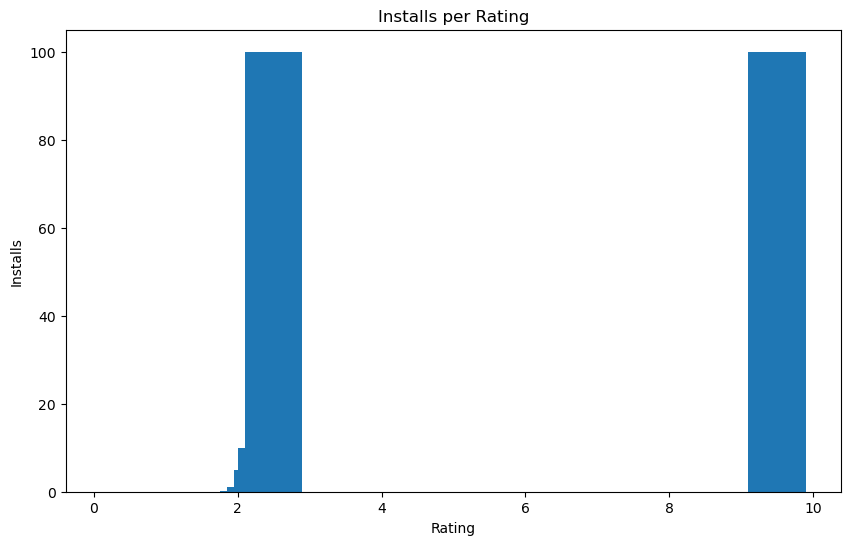

In [9]:
print('\033[1mOra vogliamo controllare la correlazione tra il rating e le volte nelle quali è stato scaricata un\'applicazione\033[0m')
print('\n')
data_app_installs_non_nulli = data_app['Installs'].dropna()

def converti_a_intero(s):
    if s == 'Free':
        s = '0'
    s = s.replace('+', '')
    s = s.replace(',', '')
    return int(s)

data_app_modificato = data_app_installs_non_nulli.apply(converti_a_intero)


#Crea un array di valori di x (puoi usare l'indice delle righe)
x_values = data_app['Rating'].sort_values(ascending = False)

#Prendi i valori delle installazioni
y_values_ord = data_app_modificato.sort_values(ascending = False)
print(y_values_ord)

#Imposta le dimensioni del grafico
plt.figure(figsize=(10, 6))

#Traccia il grafico
plt.bar(x_values/2, y_values_ord/10**7)

#Aggiungi etichette agli assi
plt.xlabel('Rating')
plt.ylabel('Installs')

#Titolo del grafico
plt.title('Installs per Rating')

#Mostra il grafico
plt.show()

